In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras import Input
import keras.activations as act
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error 

In [3]:
df = pd.read_csv('./melting-point/train_scaled.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,328,329,330,331,332,333,334,335,336,Tm
0,-0.754123,-0.423486,-0.27013,-0.175097,-0.179304,-0.138462,-0.114009,-0.086417,-0.077072,-0.027441,...,-0.0194,-0.041507,-0.043413,-0.0194,-0.062273,-0.082991,-0.033615,-0.027441,-0.032344,213.15
1,-0.754123,-0.423486,-0.27013,-0.175097,-0.179304,-0.138462,-0.114009,-0.086417,-0.077072,-0.027441,...,-0.0194,-0.041507,-0.043413,-0.0194,6.068127,-0.082991,-0.033615,-0.027441,-0.032344,407.15
2,0.723002,-0.156117,-0.27013,-0.175097,-0.179304,-0.138462,-0.114009,-0.086417,-0.077072,-0.027441,...,-0.0194,-0.041507,-0.043413,-0.0194,-0.062273,-0.082991,-0.033615,-0.027441,-0.032344,324.15
3,-0.015560,-0.423486,-0.27013,-0.175097,-0.179304,-0.138462,-0.114009,-0.086417,-0.077072,-0.027441,...,-0.0194,-0.041507,-0.043413,-0.0194,-0.062273,-0.082991,-0.033615,-0.027441,-0.032344,351.15
4,0.723002,0.378623,-0.27013,-0.175097,-0.179304,-0.138462,-0.114009,-0.086417,-0.077072,-0.027441,...,-0.0194,-0.041507,-0.043413,-0.0194,-0.062273,-0.082991,-0.033615,-0.027441,-0.032344,126.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,-0.754123,-0.156117,-0.27013,-0.175097,-0.179304,-0.138462,-0.114009,-0.086417,-0.077072,-0.027441,...,-0.0194,-0.041507,-0.043413,-0.0194,-0.062273,-0.082991,-0.033615,-0.027441,-0.032344,256.45
2654,-0.754123,-0.423486,-0.27013,-0.175097,-0.179304,-0.138462,-0.114009,-0.086417,-0.077072,-0.027441,...,-0.0194,-0.041507,-0.043413,-0.0194,-0.062273,-0.082991,-0.033615,-0.027441,-0.032344,231.15
2655,-0.754123,-0.423486,-0.27013,-0.175097,-0.179304,-0.138462,-0.114009,-0.086417,-0.077072,-0.027441,...,-0.0194,-0.041507,-0.043413,-0.0194,-0.062273,-0.082991,-0.033615,-0.027441,-0.032344,256.25
2656,-0.015560,-0.156117,-0.27013,-0.175097,-0.179304,-0.138462,-0.114009,-0.086417,-0.077072,-0.027441,...,-0.0194,-0.041507,-0.043413,-0.0194,-0.062273,-0.082991,-0.033615,-0.027441,-0.032344,333.15


In [4]:
melting_point={}
melting_point["data"] = df.drop(['Tm'], axis=1).values
melting_point["target"] = df["Tm"].values

In [5]:
rows = len(melting_point['data'][0])

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(melting_point["data"], melting_point["target"], test_size=0.1)

# Rede neural

In [12]:
def build_model(lr=0.001):
    model = Sequential()

    #337
    model.add(Input(shape=(rows,)))
    
    model.add(Dense(500))
    model.add(Activation(act.log_sigmoid))

    model.add(Dense(400))
    model.add(Activation(act.log_sigmoid))

    model.add(Dense(300))
    model.add(Activation(act.log_sigmoid))

    model.add(Dense(200))
    model.add(Activation(act.log_sigmoid))

    model.add(Dense(100))
    model.add(Activation(act.log_sigmoid))

    model.add(Dense(50))
    model.add(Activation(act.log_sigmoid))
    
    model.add(Dense(1))
    
    model.compile(optimizer=Adam(learning_rate=lr), loss='mean_absolute_error', metrics=['mean_absolute_error'])
    return model

regressor = KerasRegressor(model=build_model, epochs=100, batch_size=32, verbose=0, lr=0.001)

In [8]:
regressor.fit(X_train, 
          Y_train, 
          epochs=100, 
          batch_size=32,
          validation_data=(X_test, Y_test)) 

,model,<function bui...001F722B72E80>
,build_fn,None
,warm_start,False
,random_state,None
,optimizer,'rmsprop'
,loss,None
,metrics,None
,batch_size,32
,validation_batch_size,None
,verbose,0
,callbacks,None


In [9]:
pred = regressor.predict(X_test)

print("R2 score:", regressor.score(X_test, Y_test))
print("Mean Absolute error:", mean_absolute_error(Y_test, pred))

R2 score: 0.39955857472821454
Mean Absolute error: 38.46446384974888


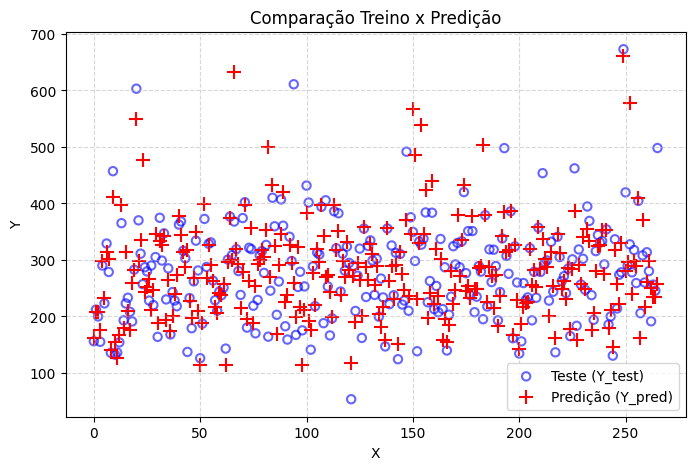

In [10]:
plt.figure(figsize=(8, 5))
x_range = np.arange(0, len(X_test), 1)
plt.scatter(x_range, Y_test, color='blue', alpha=0.6, label='Teste (Y_test)', facecolors='none', edgecolors='blue', linewidths=1.5)
plt.scatter(x_range, pred, color='red', marker='+', label='Predição (Y_pred)', s=100)

plt.title("Comparação Treino x Predição")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [79]:
nn_scores = cross_val_score(regressor, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(nn_scores)
print(nn_scores.mean())
print(nn_scores.std())

[-40.67618811 -38.47059542 -40.73639686 -34.38965505 -38.25485798
 -44.85957322 -41.70113103 -38.92521661 -38.11789672 -36.45361604]
-39.258512703690215
2.759450234844876


In [12]:
from sklearn.model_selection import GridSearchCV

parameters = {
 'lr': [0.001, 0.01, 0.1],
 'batch_size': [32, 64, 128]
}

gs = GridSearchCV(regressor, parameters, cv=10, n_jobs=-1)
gs.fit(X_train, Y_train)


KeyboardInterrupt


KeyboardInterrupt



In [ ]:
gs_scores = cross_val_score(gs.best_estimator_, melting_point["data"], melting_point["target"], cv=10, scoring='neg_mean_absolute_error')
print(gs_scores)
print(gs_scores.mean())
print(gs_scores.std())